In [162]:
import pandas as pd
import numpy as np

In [163]:
# 종목 이름을 입력하면 종목에 해당하는 코드를 불러와 # 네이버 금융(http://finance.naver.com)에 넣어줌 
def get_url(code): 
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)
    print("요청 URL = {}".format(url))
    return url

In [164]:
# KODEX 코스닥150 레버리지 일자데이터 url 가져오기
CODE = '233740'
url = get_url(CODE)

# 일자 데이터를 담을 df라는 DataFrame 정의
df = pd.DataFrame()

# 1페이지에서 20페이지의 데이터만 가져오기
for page in range(1, 57): 
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    df = df.append(pd.read_html(pg_url, header=0)[0], ignore_index=True) 

# df.dropna()를 이용해 결측값 있는 행 제거 
df = df.dropna() 

# 상위 5개 데이터 확인하기
df.head()

요청 URL = http://finance.naver.com/item/sise_day.nhn?code=233740


,날짜,종가,전일비,시가,고가,저가,거래량
0,2018.04.03,22795,395,21860,22795,21805,10796919
1,2018.04.02,22400,365,22925,23040,22360,8285034
2,2018.03.30,22765,25,22810,23035,22630,11230257
3,2018.03.29,22790,1150,21800,22790,21760,13697330
4,2018.03.28,21640,460,21400,21795,21000,14679295


In [165]:
# 데이터 과거 순으로 재정렬함(reverse)
df.iloc[:] = df.iloc[::-1].values
df.head()

,날짜,종가,전일비,시가,고가,저가,거래량
0,2015.12.18,10710,380,10230,10710,10165,1841150
1,2015.12.21,10720,10,10695,10825,10670,1274858
2,2015.12.22,10495,225,10740,10750,10450,1374974
3,2015.12.23,10425,70,10535,10635,10415,2532341
4,2015.12.24,10295,130,10480,10525,10290,1536790


In [195]:
def calculate_moving_average_score(df):
    # 3, 5, 10, 20일 평균이평선 스코어 계산
    df['3일이동평균'] = df['종가'].rolling(window=3).mean().fillna(0)
    df['5일이동평균'] = df['종가'].rolling(window=5).mean().fillna(0)
    df['10일이동평균'] = df['종가'].rolling(window=10).mean().fillna(0)
    df['20일이동평균'] = df['종가'].rolling(window=20).mean().fillna(0)

    data = {'denominator': (df[['3일이동평균', '5일이동평균', '10일이동평균', '20일이동평균']] > 0).astype(int).sum(axis=1)}
    temp_df = pd.DataFrame(data)
    
    df['평균이평선스코어'] = ((((df['종가'] > df['3일이동평균']) & (df['3일이동평균'] > 0)).astype(int)
                        + ((df['종가'] > df['5일이동평균']) & (df['5일이동평균'] > 0)).astype(int) 
                        + ((df['종가'] > df['10일이동평균']) & (df['10일이동평균'] > 0)).astype(int)
                        + ((df['종가'] > df['20일이동평균']) & (df['20일이동평균'] > 0)).astype(int))/temp_df.denominator).fillna(0)
    return df

#     df.head(20)

In [196]:
calculate_moving_average_score(df)

df.head(20)

,날짜,종가,전일비,시가,고가,저가,거래량,3일이동평균,5일이동평균,10일이동평균,20일이동평균,평균이평선스코어,수익률,자산
0,2015.12.18,10710,380,10230,10710,10165,1841150,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.000000
1,2015.12.21,10720,10,10695,10825,10670,1274858,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.000000
2,2015.12.22,10495,225,10740,10750,10450,1374974,10641.666667,0.0,0.0,0.00,0.000000,0.000000,0.000000
3,2015.12.23,10425,70,10535,10635,10415,2532341,10546.666667,0.0,0.0,0.00,0.000000,0.000000,0.000000
4,2015.12.24,10295,130,10480,10525,10290,1536790,10405.000000,10529.0,0.0,0.00,0.000000,0.000000,0.000000
5,2015.12.28,10305,10,10290,10460,10210,2172665,10341.666667,10448.0,0.0,0.00,0.000000,0.000000,0.000000
6,2015.12.29,11305,1000,10360,11305,10310,2660830,10635.000000,10565.0,0.0,0.00,1.000000,0.000000,1.000000
7,2015.12.30,11625,320,11410,11665,11370,1997046,11078.333333,10791.0,0.0,0.00,1.000000,0.009288,1.009288
8,2016.01.04,11110,515,11740,11790,10910,2897533,11346.666667,10928.0,0.0,0.00,0.500000,0.009892,0.504946
9,2016.01.05,11400,290,10920,11490,10850,2806972,11378.333333,11149.0,10839.0,0.00,1.000000,-0.017102,0.982898


In [197]:
def calculate_daily_profit(df, transaction_cost):
    df['수익률'] = 0.0
    df['수익률'] = ((df[df['평균이평선스코어'] > 0].shift(-1)['시가']*(1-transaction_cost)/df[df['평균이평선스코어'] > 0]['종가']*(1+transaction_cost))-1)
#     df['수익률'] = df['수익률'].shift(1)
    df['수익률'] = df['수익률'].fillna(0)

In [199]:
# 거래비용
T_COST = 0.0003
calculate_daily_profit(df, T_COST)
df.head(20)

,날짜,종가,전일비,시가,고가,저가,거래량,3일이동평균,5일이동평균,10일이동평균,20일이동평균,평균이평선스코어,수익률,자산
0,2015.12.18,10710,380,10230,10710,10165,1841150,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.000000
1,2015.12.21,10720,10,10695,10825,10670,1274858,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.000000
2,2015.12.22,10495,225,10740,10750,10450,1374974,10641.666667,0.0,0.0,0.00,0.000000,0.000000,0.000000
3,2015.12.23,10425,70,10535,10635,10415,2532341,10546.666667,0.0,0.0,0.00,0.000000,0.000000,0.000000
4,2015.12.24,10295,130,10480,10525,10290,1536790,10405.000000,10529.0,0.0,0.00,0.000000,0.000000,0.000000
5,2015.12.28,10305,10,10290,10460,10210,2172665,10341.666667,10448.0,0.0,0.00,0.000000,0.000000,0.000000
6,2015.12.29,11305,1000,10360,11305,10310,2660830,10635.000000,10565.0,0.0,0.00,1.000000,0.009288,1.000000
7,2015.12.30,11625,320,11410,11665,11370,1997046,11078.333333,10791.0,0.0,0.00,1.000000,0.009892,1.009288
8,2016.01.04,11110,515,11740,11790,10910,2897533,11346.666667,10928.0,0.0,0.00,0.500000,-0.017102,0.504946
9,2016.01.05,11400,290,10920,11490,10850,2806972,11378.333333,11149.0,10839.0,0.00,1.000000,0.006579,0.982898


In [213]:
idx = 8
df.iloc[idx-1]['자산'] * (1-df.iloc[idx]['평균이평선스코어'])

0.0

In [216]:
df['자산'] = 1.0
for idx, row in df.iterrows():
    if idx > 0:
        df.loc[idx:idx+1,'자산'] = df.iloc[idx-1]['자산'] * (1-row['평균이평선스코어']) + df.iloc[idx-1]['자산']*df.iloc[idx]['평균이평선스코어']*(1+df.iloc[idx]['수익률'])
    

In [223]:
df.tail(10)

,날짜,종가,전일비,시가,고가,저가,거래량,3일이동평균,5일이동평균,10일이동평균,20일이동평균,평균이평선스코어,수익률,자산
550,2018.03.21,24395,370,24800,25170,24395,16112498,24326.666667,24466.0,24181.0,23635.75,0.75,-0.147366,0.430772
551,2018.03.22,23380,1015,24615,24895,23150,15702819,24180.000000,24224.0,24247.0,23625.25,0.00,0.000000,0.430772
552,2018.03.23,20505,2875,22000,22480,20400,26973606,22760.000000,23373.0,23977.0,23485.00,0.00,0.000000,0.430772
553,2018.03.26,22100,1595,20800,22110,20205,22997275,21995.000000,23029.0,23730.0,23410.00,0.25,0.015611,0.432454
554,2018.03.27,22100,0,22445,22500,22005,10772046,21568.333333,22496.0,23491.0,23326.75,0.25,-0.013575,0.430986
555,2018.03.28,21640,460,21400,21795,21000,14679295,21946.666667,21945.0,23205.5,23223.75,0.00,0.000000,0.430986
556,2018.03.29,22790,1150,21800,22790,21760,13697330,22176.666667,21827.0,23025.5,23230.25,0.50,0.000877,0.431175
557,2018.03.30,22765,25,22810,23035,22630,11230257,22398.333333,22279.0,22826.0,23220.25,0.50,0.007028,0.432690
558,2018.04.02,22400,365,22925,23040,22360,8285034,22651.666667,22339.0,22684.0,23228.75,0.25,-0.024107,0.430083
559,2018.04.03,22795,395,21860,22795,21805,10796919,22653.333333,22478.0,22487.0,23212.75,0.75,0.000000,0.430083


In [220]:
%matplotlib inline
# import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import datetime as dt

ValueError: Error parsing datetime string "2015.12.18" at position 4

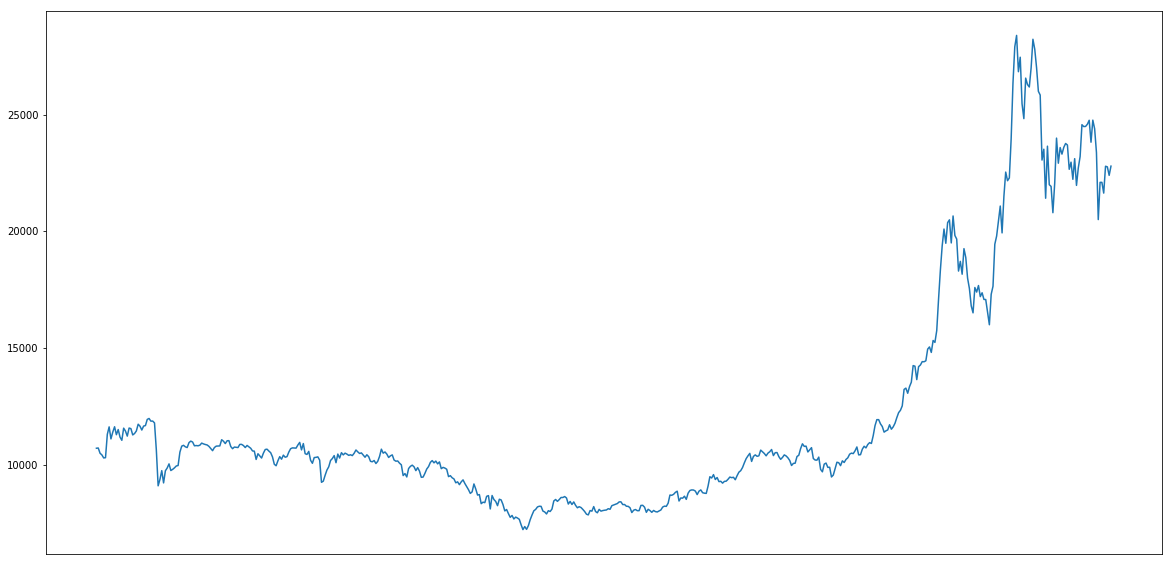

In [221]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20, 10)
ax.plot(df['날짜'], df['종가'])

# format the ticks
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years...
datemin = np.datetime64(df['날짜'][0], 'Y')
datemax = np.datetime64(df['날짜'].iloc[-1].date, 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
figure.autofmt_xdate()

plt.ylabel('KODEX150 레버리지')

plt.show()

ValueError: Error parsing datetime string "2015.12.18" at position 4

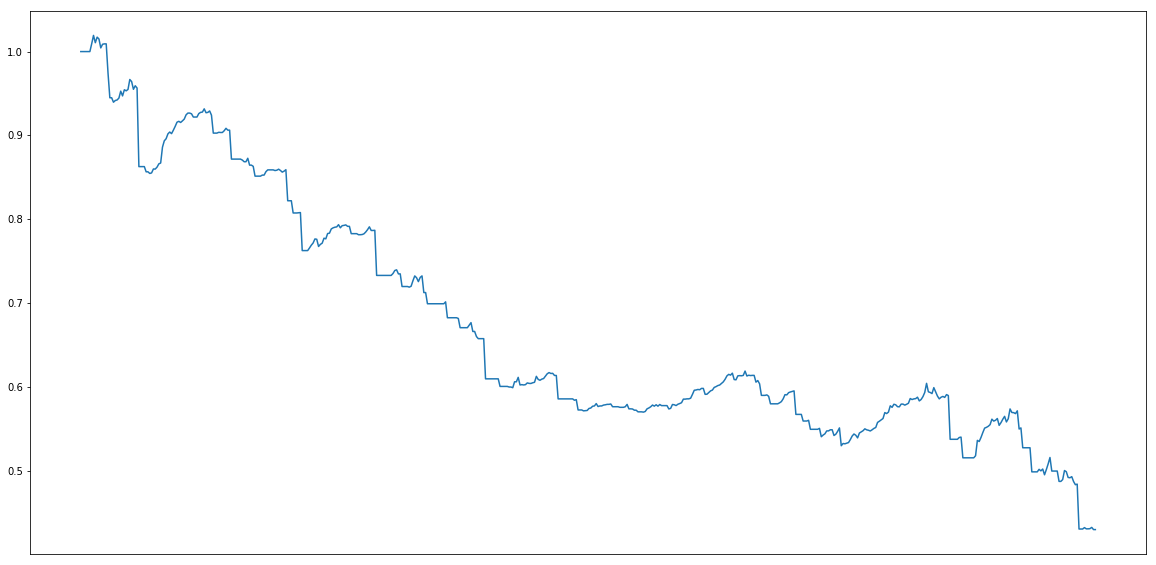

In [222]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20, 10)
# ax.plot(kosdaq_train.date, kosdaq_train.asset)
ax.plot(df['날짜'], df['자산'])

# format the ticks
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years...
datemin = np.datetime64(df['날짜'][0], 'Y')
datemax = np.datetime64(df.iloc[-1].date, 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
figure.autofmt_xdate()

plt.ylabel('자산')

plt.show()

In [96]:
# Write to Excel
writer = pd.ExcelWriter('kodex150_leverage.xlsx')
df.to_excel(writer, index=True)
writer.save()